In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Network
## Session 01 

## MP Neuron

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import accuracy_score

## Setup Global Parameters

In [3]:
###----------------
### Some parameters
###----------------

inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results


# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Read Data

In [4]:
data_df = pd.read_csv(os.path.join(inpDir, 'breast_cancer_mod.csv'))

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


## Visualization

In [5]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [7]:
data_df.describe() # Generate descriptive statistic

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000
mean,0.820738,0.880492,0.827768,0.954306,0.811951,0.910369,0.917399,0.899824,0.831283,0.927944,...,0.790861,0.868190,0.966608,0.762742,0.942004,0.926186,0.678383,0.956063,0.97891,0.627417
std,0.383909,0.324671,0.377914,0.209005,0.391095,0.285904,0.275520,0.300498,0.374831,0.258809,...,0.407052,0.338582,0.179816,0.425776,0.233942,0.261698,0.467508,0.205135,0.14381,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [8]:
# what labels are present?
data_df.target.unique()

array([0, 1])

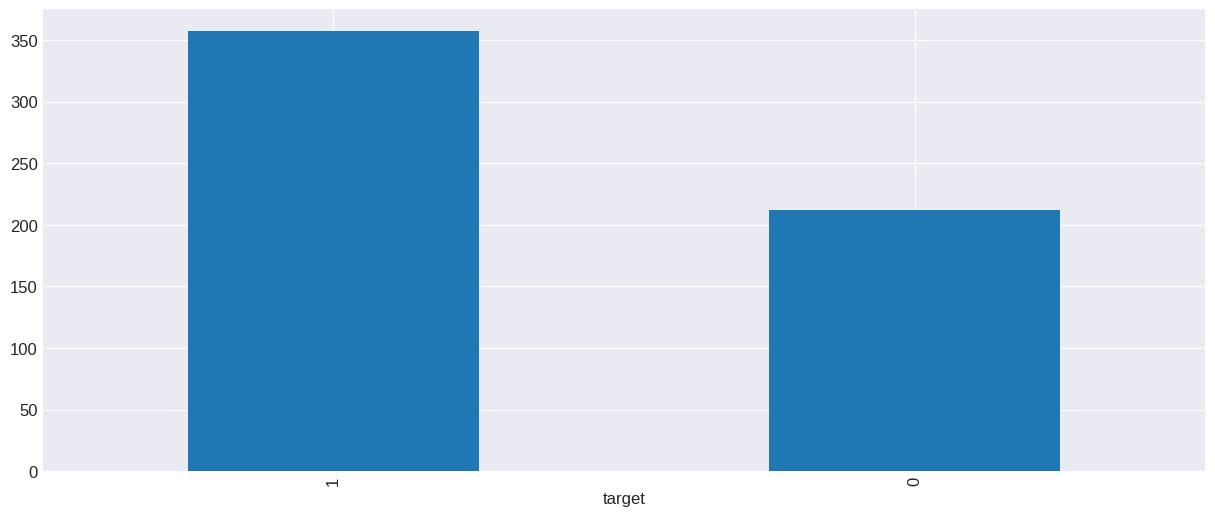

In [9]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

feature_df = data_df.drop('target', axis = 1) # Dataframe with features

labels = data_df['target'] # series with targets

X_train, X_test, y_train, y_test = train_test_split (feature_df, labels, 
                                                     test_size=TEST_SIZE, 
                                                     stratify=labels, 
                                                     random_state=RANDOM_STATE)

In [11]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)

X_train['target']  = y_train

X_train.sort_values('total', inplace = True)

X_train.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


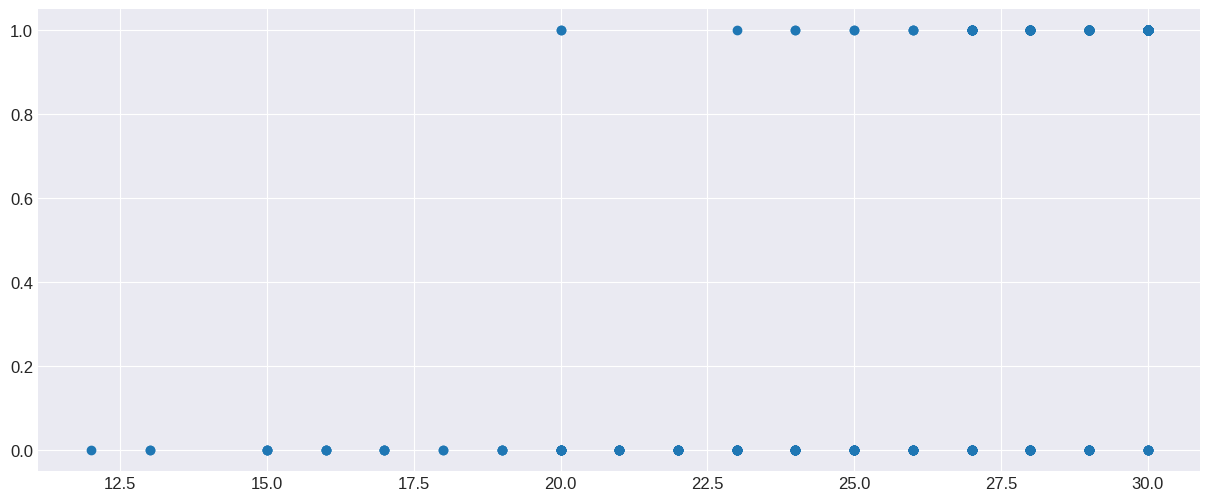

In [12]:
plt.scatter(X_train['total'], X_train['target'])

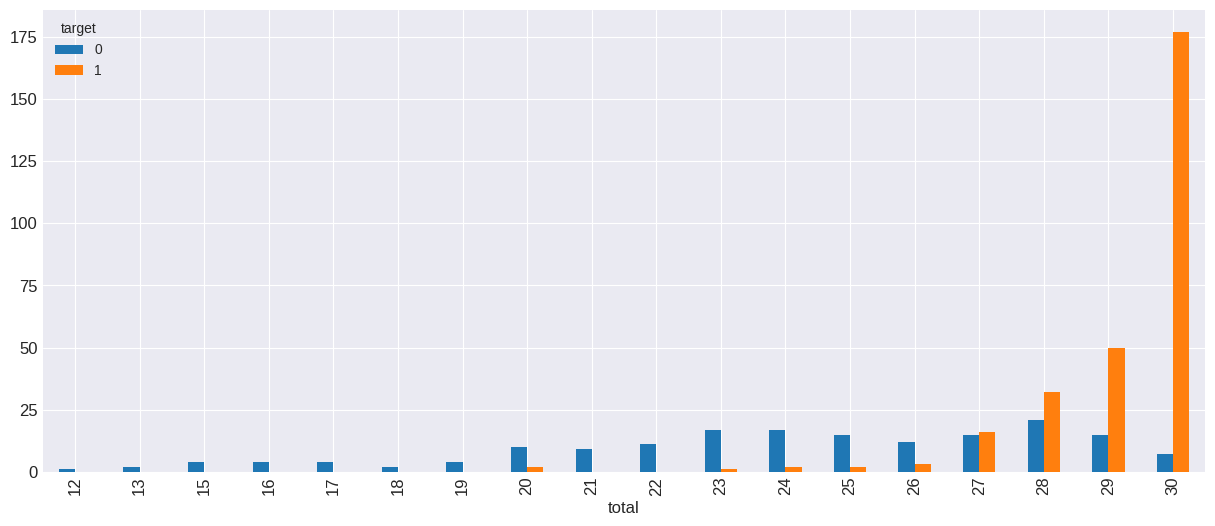

In [15]:
tmp_df = X_train.groupby(['total', 'target']).agg({'target': 'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace=True)
# tmp_df
tmp_df.pivot(index='total', 
             columns='target', 
             values='count').plot(kind='bar');

In [19]:
accuracy = {}

for b in range(X_train.shape[1]):

    X_train['pred'] = X_train['total'] >= b
    
    accuracy[b] = accuracy_score(X_train['target'], X_train['pred'])

In [21]:
b_best = max(accuracy, key=accuracy.get)
b_best

27

In [23]:
accuracy[27]

0.8505494505494505

In [32]:
a = np.array([0.1, 0.2, 0.3])
a.shape

(3,)

In [33]:
a.T.shape

(3,)

In [34]:
a.T.dot(a)

0.14